In [58]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import time

'''
Sources pour importer les donnees:
https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python
'''
start = time.time()

im_size = 28
num_images = 10000
N = num_images
k = 26

f = gzip.open('samples/emnist-letters-train-images-idx3-ubyte.gz', 'r') # importation de la base de donnees d'images de lettres
f.read(16)
buf = f.read( im_size * im_size * num_images) # buffer
data = np.frombuffer(buf, dtype = np.uint8).astype(np.float32) # Interpret a buffer as a 1-dimensional array.
data = data.reshape(num_images, im_size, im_size, 1) # reshape a la bonne taille

def printim(ind):
    image = np.asarray(data[ind]).squeeze() # L'image n'est pas dans le bon sens
    image = np.fliplr(image) # Donc on la flip 
    image = np.rot90(image) # Et on la tourne de 90 degres
    #plt.imshow(image) # Pour que l'image soit dans le bon sens
    #plt.show()
    return image

def readim(num):
    im = printim(num)
    th = 128
    im_bool = (im > th) 
    mat = np.zeros((im_size, im_size))
    # Passage de matrice RGB a matrice 2D
    for i in range(len(im)):
        for j in range(len(im)):
            if im_bool[i,j]:
                mat[i,j] = 1
            else:
                mat[i,j] = 0
    return mat

def learn(mat):
    for i in range(im_size):
        for j in range(im_size):
            if mat[i,j] == 1:
                mat[i,j] += 1
            else:
                mat[i,j] += -1
    return mat

alphabet = np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])
labels = np.zeros(N+1)
tabalph = np.zeros(N+1, dtype=str)

f = gzip.open('samples/emnist-letters-train-labels-idx1-ubyte.gz','r') # importation de la base de donnees de labels de lettres
# Le code ci dessous va lire la base de donnee et renvoyer la lettre afficher a l'ecran
f.read(8)
for i in range(0,N+1):   
    buf = f.read(1)
    labels[i] = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    tabalph[i] = alphabet[int(labels[i]) - 1]

end = time.time()
print(f"Temps d'execution du programme: {end - start} s") # Approximativement 46 minutes pour lire toutes les donnees avec num_image = 10 000

Wk = np.zeros((k,im_size,im_size))
for i in range(num_images):
    Wk[int(labels[i]) - 1] += learn(readim(i))

Temps d'execution du programme: 0.12555265426635742 s


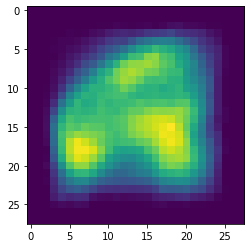

In [60]:
plt.imshow(Wk[0])